In [11]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    validation_split=0.2
)  # we don't expect Bo to be upside-down so we will not flip vertically

# No need to augment validation data
#datagen_valid = ImageDataGenerator(samplewise_center=True)

In [2]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    "H:\\the-nature-conservancy-fisheries-monitoring\\train",
    target_size=(225, 225),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=8,
    subset='training'
)

# load and iterate validation dataset
valid_it = datagen_train.flow_from_directory(
    "H:\\the-nature-conservancy-fisheries-monitoring\\train",
    target_size=(225, 225),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=8,
    subset='validation'
)

Found 3025 images belonging to 8 classes.
Found 752 images belonging to 8 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
num_classes=8
model = Sequential()
model.add(Conv2D(125, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(225, 225, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(100, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 125)     3500      
                                                                 
 batch_normalization (BatchN  (None, 225, 225, 125)    500       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 125)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 113, 113, 100)     112600    
                                                                 
 dropout (Dropout)           (None, 113, 113, 100)     0         
                                                                 
 batch_normalization_1 (Batc  (None, 113, 113, 100)    4

In [5]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [6]:
model.fit(
    train_it, 
    steps_per_epoch=train_it.samples/train_it.batch_size, 
    validation_data=valid_it, 
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=20)

Epoch 1/20
378/378 [==============================] - 75s 186ms/step - loss: 2.7697 - accuracy: 0.4182 - val_loss: 2.7689 - val_accuracy: 0.4082
Epoch 2/20
378/378 [==============================] - 70s 183ms/step - loss: 1.5975 - accuracy: 0.4942 - val_loss: 1.4157 - val_accuracy: 0.5066
Epoch 3/20
378/378 [==============================] - 67s 178ms/step - loss: 1.4543 - accuracy: 0.5352 - val_loss: 1.4104 - val_accuracy: 0.5279
Epoch 4/20
378/378 [==============================] - 46s 120ms/step - loss: 1.3224 - accuracy: 0.5557 - val_loss: 1.3745 - val_accuracy: 0.5479
Epoch 5/20
378/378 [==============================] - 36s 94ms/step - loss: 1.2591 - accuracy: 0.5841 - val_loss: 1.3367 - val_accuracy: 0.5864
Epoch 6/20
378/378 [==============================] - 35s 94ms/step - loss: 1.2201 - accuracy: 0.5736 - val_loss: 1.1986 - val_accuracy: 0.5638
Epoch 7/20
378/378 [==============================] - 36s 94ms/step - loss: 1.2047 - accuracy: 0.5825 - val_loss: 1.2176 - val_accur

In [7]:
model.save('fish_model')

INFO:tensorflow:Assets written to: fish_model\assets


In [ ]:
from tensorflow import keras

model = keras.models.load_model('fish_model')

In [8]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

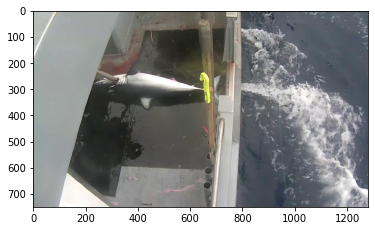

In [8]:
show_image('/Users/mateuszfabisiewicz/Documents/the-nature-conservancy-fisheries-monitoring/train/SHARK/img_00247.jpg')

In [12]:
from tensorflow.keras.preprocessing import image as image_utils

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="greyscale", target_size=(225,225))
    return image

In [13]:
image = load_and_scale_image('/Users/mateuszfabisiewicz/Documents/the-nature-conservancy-fisheries-monitoring/train/SHARK/img_00247.jpg')
plt.imshow(image, cmap='grey')

ValueError: color_mode must be "grayscale", "rgb", or "rgba"